<a href="https://colab.research.google.com/github/ss0ng22/Study/blob/main/AI_16_%EB%B0%95%EC%86%A1%EB%AF%B8_Project1ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part1. 라이브러리, 파일 불러오기**

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

plt.style.use("default")

In [2]:
# 파일 불러오기
from google.colab import files
files.upload();

Saving vgames2.csv to vgames2 (2).csv


In [3]:
df = pd.read_csv('vgames2.csv')
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


# **Part2. EDA**

  **✅ Data Description**

*   `Name` : 게임의 이름입니다.
*   `Platform` : 게임이 지원되는 플랫폼의 이름입니다.
*   `Year` : 게임이 출시된 연도입니다.
*   `Genre` : 게임의 장르입니다.
*   `Publisher` : 게임을 배급한 회사입니다.
*   `NA_Sales` : 북미지역에서의 출고량입니다.
*   `EU_Sales` : 유럽지역에서의 출고량입니다.
*   `JP_Sales` : 일본지역에서의 출고량입니다.
*   `Other_Sales` : 기타지역에서의 출고량입니다.

In [10]:
# Year 정수형으로 변환
df['Year'] = df['Year'].fillna(0)
df['Year'] = df['Year'].astype(int)

In [11]:
# ~M 에서 M지우기
df['NA_Sales'] = df['NA_Sales'].str.replace('M','')
df['EU_Sales'] = df['EU_Sales'].str.replace('M','')
df['JP_Sales'] = df['JP_Sales'].str.replace('M','')
df['Other_Sales'] = df['Other_Sales'].str.replace('M','')

In [12]:
# ~K -> *0.001로 변환
df['NA_Sales'] = df['NA_Sales'].str.replace('K','*0.001')
df['EU_Sales'] = df['EU_Sales'].str.replace('K','*0.001')
df['JP_Sales'] = df['JP_Sales'].str.replace('K','*0.001')
df['Other_Sales'] = df['Other_Sales'].str.replace('K','*0.001')

In [13]:
# 문자열을 연산해주는 eval
df['NA_Sales'] = df['NA_Sales'].apply(eval)
df['EU_Sales'] = df['EU_Sales'].apply(eval)
df['JP_Sales'] = df['JP_Sales'].apply(eval)
df['Other_Sales'] = df['Other_Sales'].apply(eval)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16598 non-null  int64  
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  float64
 7   EU_Sales     16598 non-null  float64
 8   JP_Sales     16598 non-null  float64
 9   Other_Sales  16598 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 1.3+ MB


In [15]:
## 나중에 해볼거야
#import re

#pat = df['NA_Sales'].str.contains(r'[^0-9]')
#match_pat = df[pat]
#match_pat.head(10)

# 연산자 앞 뒤로 잘라서 연산
#for index, val in enumerate(match_pat['NA_Sales']):
#  cal = re.search(r'[^0-9]', val).group() # 연산자 기호만 추출
#  first, second = val.split(cal) # 연산자 기준으로 split
#  if cal == '*': # 연산자에 따라 결과 반환
#    match_pat.iloc[index, 2] = float(first) * float(second)

#match_pat.head(10)

# **Part3. 지역별 게임 선호 경향**

In [16]:
# 지역별 게임 장르 선호 경향
sum_Sales_by_Genre = df.groupby('Genre').agg({'NA_Sales' : 'sum', 'EU_Sales' : 'sum' , 'JP_Sales' : 'sum' , 'Other_Sales' : 'sum'})
df_Genre = pd.DataFrame(sum_Sales_by_Genre).reset_index()
df_Genre

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,874.81,522.16,157.90,186.45
1,Adventure,105.66,64.05,51.95,16.81
2,Fighting,223.20,101.22,87.34,36.64
3,Misc,408.05,212.36,105.27,74.04
4,Platform,446.44,201.61,130.65,51.53
5,Puzzle,123.35,50.73,56.87,12.52
6,Racing,357.19,237.10,56.40,77.10
7,Role-Playing,319.54,183.58,344.95,56.96
8,Shooter,581.92,313.05,38.28,102.65
9,Simulation,182.96,113.35,63.70,31.48


In [17]:
# 지역별 게임 플랫폼 선호 경향

sum_Sales_by_Platform = df.groupby('Platform').agg({'NA_Sales' : 'sum', 'EU_Sales' : 'sum' , 'JP_Sales' : 'sum' , 'Other_Sales' : 'sum'})
df_Platform = pd.DataFrame(sum_Sales_by_Platform).reset_index()

In [18]:
df_platform1 = df
df_platform1.loc[df.Platform.isin(['2600', 'Xone','X360','XB']), 'Platform'] = 'MicroSoft'
df_platform1.loc[df.Platform.isin(['PS', 'PS2','PS3','PS4']), 'Platform'] = 'Playstation Home'
df_platform1.loc[df.Platform.isin(['PSP', 'PSV']), 'Platform'] = 'Playstation Portable'
df_platform1.loc[df.Platform.isin(['WiiU', 'Wii','N64','GC']), 'Platform'] = 'Nintendo Home'
df_platform1.loc[df.Platform.isin(['SNES', 'SAT','NES','GBA','GB','DS','3DS','DC']), 'Platform'] = 'Nintendo Portable'
df_platform1.loc[df.Platform.isin(['PC']), 'Platform'] = 'PC'
df_platform1.loc[df.Platform.isin(['GEN']), 'Platform'] = 'Qualcomm'
df_platform1.loc[df.Platform.isin(['WS', 'TG16','SCD','PCFX','NG','GG','3DO']), 'Platform'] = 'ETC.'

# **Part4. 연도별 게임 트렌드**

  **✅ 최근 10여년간 게임  트렌드 조사**

In [19]:
# 2011년 이전 데이터 drop = df_year
df_year = df[df['Year']<2012].index
df_year1 = df.drop(df_year)
df_year2 = df_platform1[df_platform1['Year']>2011]

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

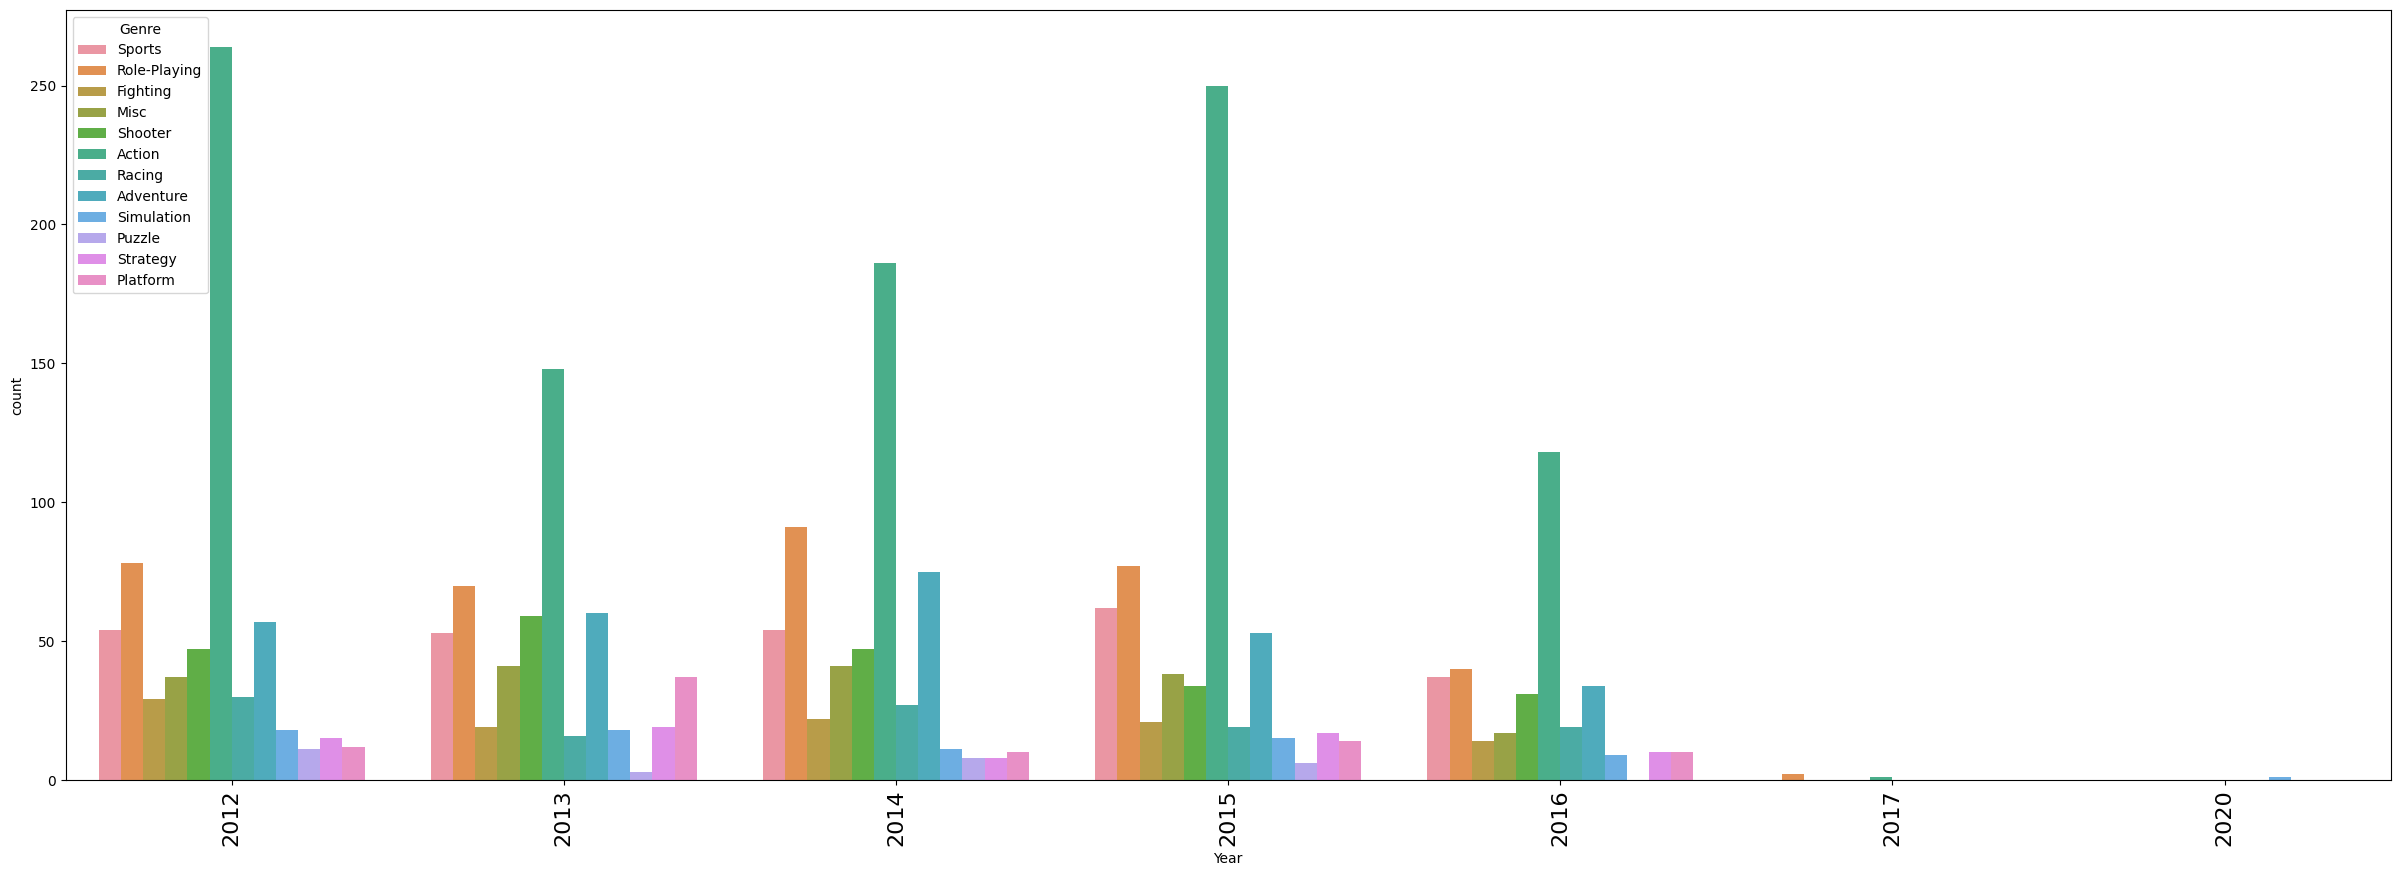

In [20]:
plt.figure(figsize=(30,10))
sns.countplot(x="Year", data=df_year1, hue = 'Genre')
plt.xticks(size=16,rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

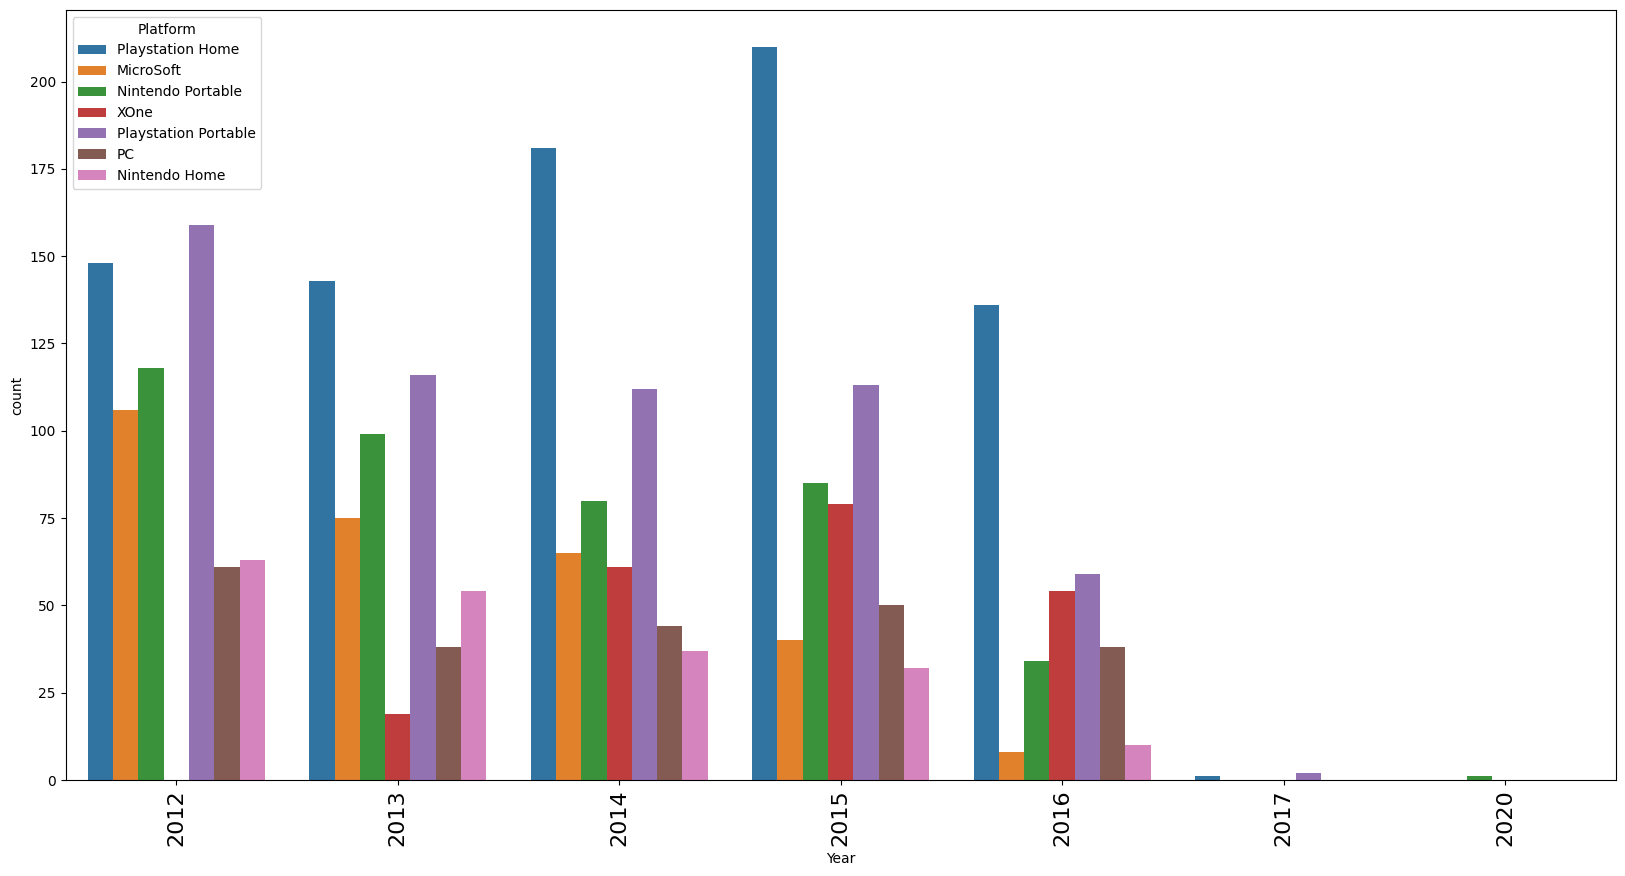

In [41]:
from seaborn.distributions import ECDF
plt.figure(figsize=(20,10))
sns.countplot(x="Year", data=df_year2, hue = 'Platform')
plt.xticks(size=16,rotation=90)

# **Part.5 출고량이 높은 게임에 대한 분석**

In [29]:
df['total'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] +df['Other_Sales']
df.loc[df.Name.isin(['Pokemon X/Pokemon Y']), 'Genre'] = 'Role-Playing'

In [71]:
best_sales = df.sort_values(by='total' ,ascending=False)
best_sales = best_sales[df_platform1['Year']>2011].reset_index()
final = best_sales[['Name','Year','Platform','Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales','total']].head(38)
final2 = final.copy()
final2 = final[['Genre','Platform','total']]
final2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Genre,Platform,total
0,Action,Playstation Home,21.39
1,Action,MicroSoft,16.38
2,Role-Playing,Nintendo Portable,14.35
3,Shooter,Playstation Home,14.24
4,Shooter,Playstation Home,14.04
5,Shooter,MicroSoft,13.74
6,Action,Playstation Home,11.99
7,Role-Playing,Nintendo Portable,11.33
8,Shooter,MicroSoft,10.21
9,Platform,Nintendo Portable,9.83


In [77]:
import plotly.express as px

fig = px.density_heatmap(data_frame=final2, x='Platform', y='Genre', nbinsx=5, nbinsy=5)
fig.show()

In [58]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt = '.1f')

ValueError: ignored

UFuncTypeError: ignored

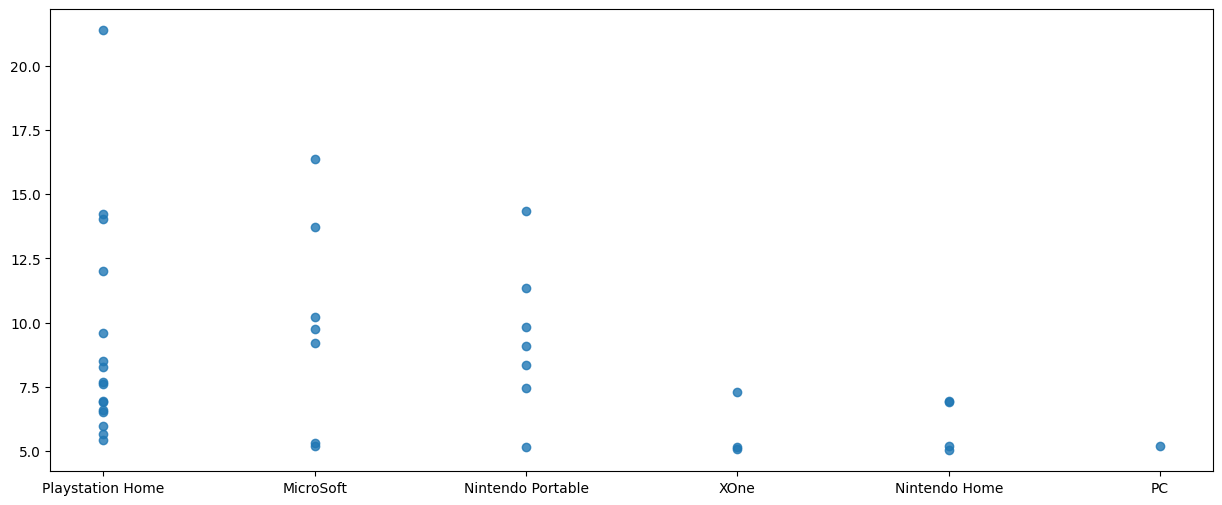

In [66]:
import plotly.express as px
fig = px.density_heatmap(data_frame=final1, x='Genre', y='Platform', z='total', nbinsx=10, nbinsy=10)
fig.show()

ValueError: ignored